1. Continuum Fit: Mg II, Mg I
2. Continuum Subtraction
3. Equivalent Width
4. Instrumental LSF
5. Fitting (N, b)
6. Monte Carlo
7. Parameter Estimation
8. Radial Velocity & Corner Plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from mpdaf.obj import Spectrum
from linetools.spectra.xspectrum1d import XSpectrum1D

import astropy.units as u
from astropy.io import fits
from astropy.modeling.models import Voigt1D
from astropy.convolution import convolve
from astropy.constants import c, m_e

from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import constants as const
from scipy.optimize import root_scalar

from mpdaf.MUSE import LSF
from IPython.display import display, Image, HTML
import corner

# 1. Continuum Fit

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt

In [3]:
# (A)
hdus_A = fits.open('D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_A_0.8.fits')
spec_A = Spectrum('D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_A_0.8.fits')

flux_A = hdus_A['DATA'].data*u.Unit(hdus_A[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_A = hdus_A['STAT'].data*u.Unit(hdus_A[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_A = np.sqrt(variance_A) #uncertainty is standard deviation
wavelength_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit)# Wavelength array

sp_A = XSpectrum1D.from_tuple((wavelength_A, flux_A, uncertainty_A))
sp_A.plot()

In [4]:
# (B)
hdus = fits.open('D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_B_0.8.fits')
spec = Spectrum('D:\Datacube\SDSSJ1320+1644\spektrum_sum_SDSSJ1320+1644_B_0.8.fits')

flux = hdus['DATA'].data*u.Unit(hdus[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance = hdus['STAT'].data*u.Unit(hdus[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty = np.sqrt(variance) #uncertainty is standard deviation
wavelength = spec.wave.coord() * u.Unit(spec.wave.unit)# Wavelength array

sp = XSpectrum1D.from_tuple((wavelength, flux, uncertainty))
sp.plot()

In [5]:
z = 0.899

## (A) Mg II Continuum Fit

In [6]:
flux_masked_A = flux_A[400:510]
uncertainty_masked_A = uncertainty_A[400:510]
rest_wavelength_masked_A = wavelength_A[400:510]/(1+z)

sp_masked_rest_A = XSpectrum1D.from_tuple((rest_wavelength_masked_A, flux_masked_A, uncertainty_masked_A))
sp_masked_rest_A.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [10]:
sp_masked_rest_A.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [11]:
sp_masked_rest_A.co

<Quantity [13025.831 , 13027.649 , 12979.029 , 12930.409 , 12882.216 ,
           12834.446 , 12787.101 , 12740.176 , 12693.672 , 12647.587 ,
           12601.919 , 12556.667 , 12511.829 , 12467.405 , 12423.393 ,
           12379.791 , 12336.598 , 12293.8125, 12251.433 , 12209.457 ,
           12167.886 , 12126.716 , 12085.946 , 12045.575 , 12005.529 ,
           11965.596 , 11925.865 , 11886.451 , 11847.466 , 11809.023 ,
           11771.237 , 11734.221 , 11698.087 , 11662.95  , 11628.924 ,
           11596.121 , 11564.655 , 11534.641 , 11506.189 , 11479.412 ,
           11453.432 , 11427.523 , 11401.682 , 11375.899 , 11350.172 ,
           11324.491 , 11298.852 , 11273.248 , 11247.673 , 11222.12  ,
           11196.585 , 11171.06  , 11145.538 , 11120.014 , 11094.482 ,
           11068.899 , 11043.069 , 11017.0205, 10990.821 , 10964.539 ,
           10938.241 , 10911.997 , 10885.873 , 10859.937 , 10834.258 ,
           10808.901 , 10783.938 , 10759.435 , 10735.458 , 10712.077 ,
      

In [13]:
np.savez("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_A.npz", values=sp_masked_rest_A.co.value, unit=str(sp_masked_rest_A.co.unit))

## (A) Mg I Continuum Fit

In [7]:
flux_masked_A2 = flux_A[490:560]
uncertainty_masked_A2 = uncertainty_A[490:560]
rest_wavelength_masked_A2 = wavelength_A[490:560]/(1+z)

sp_masked_rest_A2 = XSpectrum1D.from_tuple((rest_wavelength_masked_A2, flux_masked_A2, uncertainty_masked_A2))
sp_masked_rest_A2.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [70]:
sp_masked_rest_A2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [71]:
sp_masked_rest_A2.co

<Quantity [18689.445, 18689.445, 18492.865, 18387.064, 18340.836,
           18322.969, 18322.912, 18499.123, 18821.074, 19200.896,
           19550.713, 19782.654, 19282.86 , 17449.201, 17727.154,
           18821.176, 18996.408, 19075.928, 19076.018, 18976.697,
           18850.646, 18770.086, 18773.785, 18824.555, 18907.637,
           19009.207, 19126.217, 19319.514, 19573.576, 19855.057,
           20130.604, 20366.863, 20530.484, 20576.771, 20401.832,
           20067.254, 19671.928, 19314.738, 19094.574, 19048.074,
           19024.96 , 19016.258, 19027.562, 19064.479, 19125.865,
           19198.592, 19274.51 , 19345.576, 19395.764, 19399.1  ,
           19378.459, 19361.268, 19379.09 , 19744.176, 20334.07 ,
           20719.229, 20537.738, 19945.252, 19327.324, 19069.63 ,
           19198.64 , 19356.68 , 19350.35 , 19266.652, 19144.74 ,
           18954.408, 18399.64 , 17834.242, 18194.12 , 19263.244] 1e-20 erg / (Angstrom cm2 s)>

In [72]:
np.savez("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_A_Mgi.npz", values=sp_masked_rest_A2.co.value, unit=str(sp_masked_rest_A2.co.unit))

## (B) Mg II Continuum Fit

In [8]:
flux_masked = flux[400:510]
uncertainty_masked = uncertainty[400:510]
rest_wavelength_masked = wavelength[400:510]/(1+z)

sp_masked_rest = XSpectrum1D.from_tuple((rest_wavelength_masked, flux_masked, uncertainty_masked))
sp_masked_rest.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [5]:
sp_masked_rest.fit_continuum()

knots file exists, use this? (y) n


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [6]:
sp_masked_rest.co

<Quantity [9434.432 , 9151.041 , 9126.529 , 9102.188 , 9078.007 ,
           9053.972 , 9030.072 , 9006.296 , 8982.632 , 8959.066 ,
           8935.588 , 8912.187 , 8888.848 , 8865.562 , 8842.315 ,
           8819.097 , 8795.8955, 8772.697 , 8749.492 , 8726.268 ,
           8703.012 , 8679.712 , 8656.357 , 8632.937 , 8610.001 ,
           8588.829 , 8580.225 , 8647.637 , 8490.64  , 8440.32  ,
           8432.873 , 8396.714 , 8357.488 , 8317.698 , 8279.843 ,
           8246.422 , 8219.96  , 8202.702 , 8190.622 , 8177.7153,
           8157.9746, 8126.565 , 8085.3457, 8036.5933, 7982.3716,
           7924.744 , 7865.775 , 7807.528 , 7752.066 , 7701.454 ,
           7657.755 , 7622.5044, 7598.8726, 7594.622 , 7596.5977,
           7601.435 , 7608.2285, 7616.0713, 7624.058 , 7631.2827,
           7636.839 , 7639.8203, 7639.48  , 7637.8687, 7635.7812,
           7633.079 , 7629.6235, 7625.276 , 7619.8975, 7613.35  ,
           7605.494 , 7592.9917, 7573.711 , 7551.0576, 7528.4595,
          

In [7]:
np.savez("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_B.npz", values=sp_masked_rest.co.value, unit=str(sp_masked_rest.co.unit))

## (B) Mg I Continuum Fit

In [9]:
flux_masked2 = flux[490:560]
uncertainty_masked2 = uncertainty[490:560]
rest_wavelength_masked2 = wavelength[490:560]/(1+z)

sp_masked_rest2 = XSpectrum1D.from_tuple((rest_wavelength_masked2, flux_masked2, uncertainty_masked2))
sp_masked_rest2.plot()

(Skip 3 lines below if continuum already exist in npz file)

In [59]:
sp_masked_rest2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [60]:
sp_masked_rest2.co

<Quantity [ 9701.391 ,  9701.391 ,  9804.049 ,  9908.042 , 10016.726 ,
           10126.66  ,  9873.846 ,  9088.9795,  8506.775 ,  8902.891 ,
           10144.143 , 11265.381 , 11398.147 , 11079.097 , 10715.329 ,
           10480.26  , 10385.588 , 10292.435 , 10202.23  , 10116.998 ,
           10038.643 ,  9966.388 ,  9899.714 ,  9838.851 ,  9784.024 ,
            9735.463 ,  9696.383 ,  9857.039 , 10186.296 , 10480.645 ,
           10546.506 , 10392.052 , 10124.753 ,  9836.737 ,  9620.133 ,
            9563.304 ,  9599.529 ,  9664.449 ,  9750.511 ,  9850.164 ,
            9955.856 , 10060.036 , 10155.153 , 10233.655 , 10287.99  ,
           10310.609 , 10298.311 , 10272.289 , 10237.431 , 10194.83  ,
           10145.581 , 10090.78  , 10031.521 ,  9968.898 ,  9904.007 ,
            9807.76  ,  9649.555 ,  9474.782 ,  9330.424 ,  9413.893 ,
            9875.761 , 10431.121 , 10785.762 , 10534.738 ,  9697.378 ,
            8942.621 ,  8824.097 ,  9148.133 ,  9843.152 ,  9585.049 ] 1e-20 

In [61]:
np.savez("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_B_Mgi.npz", values=sp_masked_rest2.co.value, unit=str(sp_masked_rest2.co.unit))

# 2. Continuum Subtraction

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

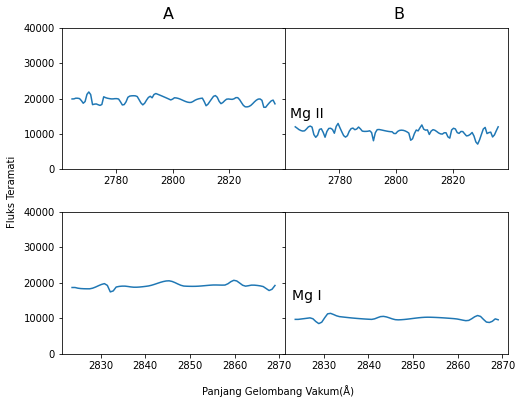

In [11]:
# (A) Mg II
wave0_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit) # Wavelength array
wave_A = wave0_A[400:510]/(1+z)
F0_A = spec_A.data * u.Unit(spec_A.unit) # Flux array
F_A = F0_A[400:510]
uncertain_A = uncertainty_A[400:510]

loaded_data_A = np.load("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_A.npz")
co_A = loaded_data_A["values"] * u.Unit(spec_A.unit)

# (A) Mg I
wave_A2 = wave0_A[490:560]/(1+z)
F_A2 = F0_A[490:560]
uncertain_A2 = uncertainty_A[490:560]

loaded_data_A2 = np.load("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_A_Mgi.npz")
co_A2 = loaded_data_A2["values"] * u.Unit(spec_A.unit)

# (B) Mg II
wave0 = spec.wave.coord() * u.Unit(spec.wave.unit) # Wavelength array
wave = wave0[400:510]/(1+z)
F0 = spec.data * u.Unit(spec.unit) # Flux array
F = F0[400:510]
uncertain = uncertainty[400:510]

loaded_data = np.load("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_B.npz")
co = loaded_data["values"] * u.Unit(spec.unit)

# (B) Mg I
wave2 = wave0[490:560]/(1+z)
F2 = F0[490:560]
uncertain2 = uncertainty[490:560]

loaded_data2 = np.load("D:\Datacube\SDSSJ1320+1644\continuum_SDSSJ1320+1644_B_Mgi.npz")
co2 = loaded_data2["values"] * u.Unit(spec.unit)

# Plot
f, ax = plt.subplots(2, 2, sharey='row', figsize=(8,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wave_A, co_A)
ax[0,0].set_ylim(0, 40000)
ax[1,0].plot(wave_A2, co_A2)
ax[1,0].set_ylim(0, 40000)
#ax[1,0].set_xlabel('Panjang Gelombang (Å)')
ax[0,1].plot(wave, co)
ax[0,1].set_ylim(0, 40000)
ax[1,1].plot(wave2, co2)
ax[1,1].set_ylim(0, 40000)

f.text(0.55,0.67, 'Mg II', fontsize=14, ha='center')
f.text(0.55,0.25, 'Mg I', fontsize=14, ha='center')

f.text(0.3, 0.91, 'A', va='center', fontsize=16)
f.text(0.7, 0.91, 'B', va='center', fontsize=16)
f.text(0.5, 0.03, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.03, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

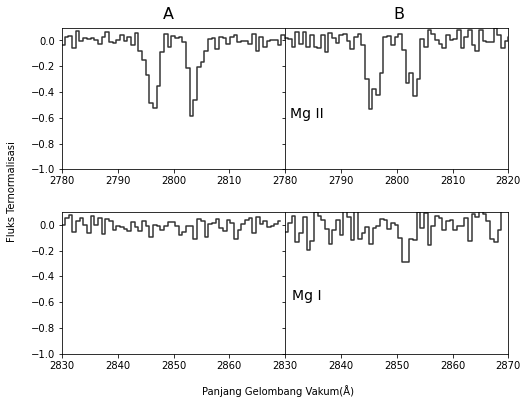

In [12]:
# (A) Mg II
wavelengths_A = wave_A.value
fluxes_A = (F_A.value / co_A.value) - 1
uncertainties_A = (uncertain_A.value / co_A.value)

# (A) Mg I
wavelengths_A2 = wave_A2.value
fluxes_A2 = (F_A2.value / co_A2.value) - 1
uncertainties_A2 = (uncertain_A2.value / co_A2.value)

# (B) Mg II
wavelengths = wave.value
fluxes = (F.value / co.value) - 1
uncertainties = (uncertain.value / co.value)

# (B) Mg I
wavelengths2 = wave2.value
fluxes2 = (F2.value / co2.value) - 1
uncertainties2 = (uncertain2.value / co2.value)

f, ax = plt.subplots(2, 2, sharey='row', figsize=(8,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wavelengths_A, fluxes_A, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,0].set_ylim(-1.0,0.1)
ax[0,0].set_xlim(2780, 2820)

ax[1,0].plot(wavelengths_A2, fluxes_A2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,0].set_xlim(2830, 2870)
ax[1,0].set_ylim(-1.0,0.1)

ax[0,1].plot(wavelengths, fluxes, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,1].set_xlim(2780, 2820)
ax[0,1].set_ylim(-1.0,0.1)
ax[0,1].tick_params(labelleft=False)

ax[1,1].plot(wavelengths2, fluxes2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,1].set_xlim(2830, 2870)
ax[1,1].set_ylim(-1.0,0.1)

xticks1 = ax[0,0].get_xticks()
xticks1 = xticks1[:-1]  # remove the last tick
ax[0,0].set_xticks(xticks1)

xticks2 = ax[1,0].get_xticks()
xticks2 = xticks2[:-1]  # remove the last tick
ax[1,0].set_xticks(xticks2)

f.text(0.55,0.67, 'Mg II', fontsize=14, ha='center')
f.text(0.55,0.25, 'Mg I', fontsize=14, ha='center')

f.text(0.3, 0.91, 'A', va='center', fontsize=16)
f.text(0.7, 0.91, 'B', va='center', fontsize=16)
f.text(0.03, 0.5, 'Fluks Ternormalisasi', va='center', rotation='vertical')
f.text(0.5, 0.03, 'Panjang Gelombang Vakum(Å)', ha='center')
plt.show()

# 3. Equivalent Width

In [13]:
def compute_ew(wavelengths, flux, continuum_level, line_range):
    
    in_line_region = (wavelengths >= line_range[0]) & (wavelengths <= line_range[1])
    lam_line = wavelengths[in_line_region]
    flux_line = flux[in_line_region]

    absorption_mask = flux_line < continuum_level
    lam_absorb = lam_line[absorption_mask]
    flux_absorb = flux_line[absorption_mask]

    ew = - np.trapz(flux_absorb, lam_absorb)

    return ew

W_lambda_A = compute_ew(wavelengths_A, fluxes_A, continuum_level=0, line_range=(2791, 2799))
W_lambda_A2 = compute_ew(wavelengths_A, fluxes_A, continuum_level=0, line_range=(2799, 2807))
W_lambda_A3 = compute_ew(wavelengths_A2, fluxes_A2, continuum_level=0, line_range=(2848, 2853))

W_lambda = compute_ew(wavelengths, fluxes, continuum_level=0, line_range=(2791, 2799))
W_lambda2 = compute_ew(wavelengths, fluxes, continuum_level=0, line_range=(2799, 2807))
W_lambda3 = compute_ew(wavelengths2, fluxes2, continuum_level=0, line_range=(2848, 2853))

print(f"Equivalent Width (W) A λ2976: {W_lambda_A:.3f} Å")
print(f"Equivalent Width (W) A λ2804: {W_lambda_A2:.3f} Å")
print(f"Equivalent Width (W) A λ2853: {W_lambda_A3:.3f} Å")

print(f"Equivalent Width (W) B λ2976: {W_lambda:.3f} Å")
print(f"Equivalent Width (W) B λ2804: {W_lambda2:.3f} Å")
print(f"Equivalent Width (W) B λ2853: {W_lambda3:.3f} Å")

Equivalent Width (W) A λ2976: 1.334 Å
Equivalent Width (W) A λ2804: 1.178 Å
Equivalent Width (W) A λ2853: 0.113 Å
Equivalent Width (W) B λ2976: 1.295 Å
Equivalent Width (W) B λ2804: 1.130 Å
Equivalent Width (W) B λ2853: 0.574 Å


# 4. Instrumental LSF

In [14]:
lambda_2796 = 2796.3543
A_2796 = 2.60e+08
f2796 = 0.6123

lambda_2804 = 2803.5315
A_2804 = 2.57e+08
f2804 = 0.3054

lambda_2853 = 2852.965
f2853 = 1.80
A_2853 = 4.91e+08

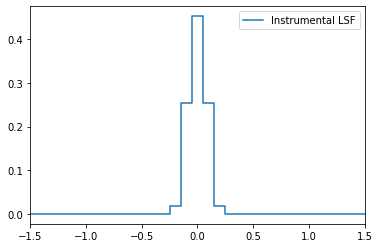

In [15]:
steps = wavelengths[1]-wavelengths[0]

lsf = LSF(typ='qsim_v1')
lsf_observed = lsf.get_LSF(lbda=lambda_2804*(1+z), step=steps, size=101) # size arbitrary asal ≥11 dan ganjil 
x_LSF = np.linspace(-5, 5, 101)
plt.plot(x_LSF, lsf_observed, drawstyle='steps-mid', label='Instrumental LSF')
plt.xlim(-1.5,1.5)
plt.legend()

In [ ]:
# finding boundaries

(2780.0, 2820.0)

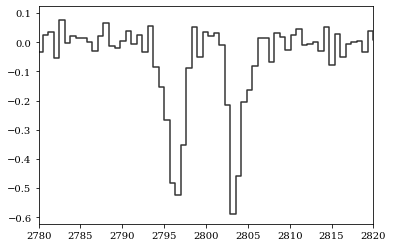

In [109]:
plt.plot(wavelengths_A, fluxes_A, 'k', alpha=0.8, drawstyle='steps-mid')
#plt.xlim(2830, 2870)
plt.xlim(2780, 2820)

In [110]:
fluxes_A+1

array([1.03330404, 1.05511582, 1.02186263, 0.99960316, 0.98708984,
       1.04591937, 0.96406432, 1.02935463, 1.00136075, 1.00757061,
       1.0060427 , 0.95537756, 1.038813  , 0.98568532, 1.06122364,
       0.96309385, 0.97875522, 1.04550455, 1.04973663, 0.95518083,
       1.01159872, 1.03797103, 0.9774692 , 1.01298577, 0.96511185,
       1.02478916, 1.03534728, 0.94463487, 1.07597821, 0.99817864,
       1.02259599, 1.01340381, 1.0159246 , 1.00255653, 0.97018984,
       1.02321342, 1.0647494 , 0.9865782 , 0.98091437, 1.00278202,
       1.03902847, 0.99277047, 1.02552154, 0.96505057, 1.05433288,
       0.91511969, 0.84496677, 0.73437708, 0.51668897, 0.47596185,
       0.64875782, 0.91352122, 1.05277376, 0.95034491, 1.03403226,
       1.02126025, 1.03046124, 0.99203633, 0.78610526, 0.41131152,
       0.5407075 , 0.79648646, 0.83702825, 0.91717964, 1.01457225,
       1.01635615, 0.93206468, 1.03071083, 1.01836709, 0.9740615 ,
       1.02392181, 1.04512742, 0.99059495, 0.99481947, 0.99949

In [123]:
print(wavelengths_A[48])
print(wavelengths_A[50])

2795.9835460275144
2797.300028386651


# 5. Fitting (N, b)

In [16]:
c_kms = c.to('km/s').value
e = 4.8032 * 1e-10

## (A) Mg II Line Fitting

In [17]:
def convolved_model(wavelengths, x_0_2796, N, b):
    x_0_2804 = x_0_2796 + (lambda_2804 - lambda_2796)

    fwhm_L_2796 = ((x_0_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
    fwhm_L_2804 = ((x_0_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)

    fwhm_G_2796 = (2 * x_0_2796 * b * np.sqrt(np.log(2))) / c_kms
    fwhm_G_2804 = (2 * x_0_2804 * b * np.sqrt(np.log(2))) / c_kms

    amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * x_0_2796 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * x_0_2804 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    
    voigt_peak_targets = [amp_V_2796, amp_V_2804]
    fwhm_Ls = [fwhm_L_2796, fwhm_L_2804]  
    fwhm_Gs = [fwhm_G_2796, fwhm_G_2804]          
    centers = [x_0_2796, x_0_2804]

    def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
        def residual(amplitude_L):
            model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
            return model(0) - target_peak

        sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
        return sol.root

    models = []

    for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
        amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
        model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        models.append(model)

    def combined_voigt(x):
        return sum(m(x) for m in models)

    intrinsic_profile = combined_voigt(wavelengths)
    return convolve(intrinsic_profile, lsf_observed, normalize_kernel=True)

In [18]:
p0_A = [2797, 5e13, 50]
bounds_A = ([2795.983,1e12,1], 
          [2797.300,1e15,200])

popt_A, _ = curve_fit(convolved_model, wavelengths_A, fluxes_A, p0=p0_A, bounds=bounds_A, 
                    sigma=uncertainties_A, absolute_sigma=True, maxfev=5000)
popt_A

array([2.79636542e+03, 1.01300450e+14, 7.47509941e+01])

Estimated Noise Standard Deviation: 0.900


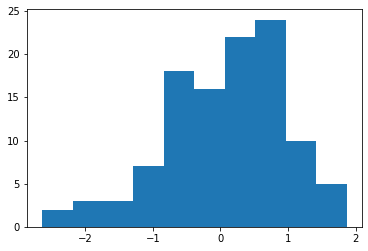

In [19]:
residuals_A = fluxes_A - convolved_model(wavelengths_A, *popt_A)

plt.hist(residuals_A / uncertainties_A)

std_A = np.std(residuals_A / uncertainties_A)
print(f"Estimated Noise Standard Deviation: {std_A:.3f}")

Estimated Noise Standard Deviation: 0.900


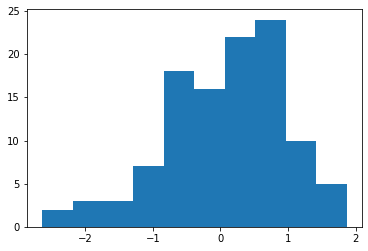

In [20]:
sigma_floor_A = 0
sigma_adjusted_A = np.sqrt(uncertainties_A**2 + sigma_floor_A**2)

plt.hist(residuals_A / sigma_adjusted_A)

std_A = np.std(residuals_A / sigma_adjusted_A)
print(f"Estimated Noise Standard Deviation: {std_A:.3f}")

In [21]:
chi_squared_A = np.sum((residuals_A / sigma_adjusted_A) ** 2)
dof_A = len(fluxes_A) - len(popt_A)

reduced_chi_squared_A = chi_squared_A / dof_A

print(f'Chi-squared: {chi_squared_A:.3f}')
print(f'Degree of freedom: {dof_A:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_A:.3f}')

Chi-squared: 89.746
Degree of freedom: 107.000
Reduced Chi-squared: 0.839


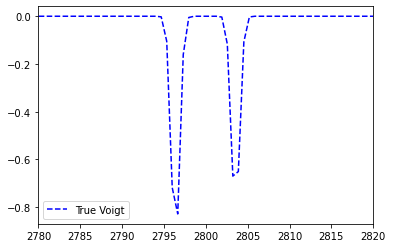

In [22]:
(recovered_peak_2796, recovered_N, recovered_b) = popt_A
recovered_peak_2804 = recovered_peak_2796 + (lambda_2804 - lambda_2796)

fwhm_L_2796 = ((recovered_peak_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
fwhm_L_2804 = ((recovered_peak_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2796 = (2 * recovered_peak_2796 * recovered_b * np.sqrt(np.log(2))) / c_kms
fwhm_G_2804 = (2 * recovered_peak_2804 * recovered_b * np.sqrt(np.log(2))) / c_kms
    
amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * recovered_peak_2796 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))
amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * recovered_peak_2804 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))

voigt_peak_targets = [amp_V_2796, amp_V_2804]
fwhm_Ls = [fwhm_L_2796, fwhm_L_2804]  
fwhm_Gs = [fwhm_G_2796, fwhm_G_2804]          
centers = [recovered_peak_2796, recovered_peak_2804]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum_A = combined_voigt(wavelengths)

plt.plot(wavelengths, true_spectrum_A, '--', label="True Voigt", color='blue')
plt.xlim(2780, 2820)
plt.legend()

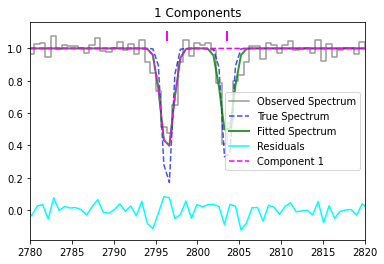

In [23]:
fitted_spectrum_A = convolve(true_spectrum_A, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths_A, fluxes_A+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_A, true_spectrum_A+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_A, fitted_spectrum_A+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths_A, residuals_A, label='Residuals', color='cyan')

v1 = Voigt1D(x_0=recovered_peak_2796, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2796, fwhm_G=fwhm_G_2796)

plt.plot(wavelengths_A, 1 - convolve(v1(wavelengths_A), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2796, recovered_peak_2804]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
#plt.xlim(2830, 2870)
plt.xlim(2780, 2820)
plt.title("1 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

## (A) Mg I Line Fitting

In [24]:
def convolved_model2(wavelengths, x_0_2853, N, b):
    fwhm_L_2853 = ((x_0_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)

    fwhm_G_2853 = (2 * x_0_2853 * b * np.sqrt(np.log(2))) / c_kms

    amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * x_0_2853 * 1e-8 * N) / (m_e.cgs.value * c.cgs.value * b * 1e5))
    
    voigt_peak_targets = [amp_V_2853]
    fwhm_Ls = [fwhm_L_2853]  
    fwhm_Gs = [fwhm_G_2853]          
    centers = [x_0_2853]

    def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
        def residual(amplitude_L):
            model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
            return model(0) - target_peak

        sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
        return sol.root

    models = []

    for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
        amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
        model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        models.append(model)

    def combined_voigt(x):
        return sum(m(x) for m in models)

    intrinsic_profile = combined_voigt(wavelengths)
    return convolve(intrinsic_profile, lsf_observed, normalize_kernel=True)

In [25]:
p0_A2 = [2852, 1e12, 30]
bounds_A2 = ([2850.617,1e10,1], 
          [2853.250,1e13,200])

popt_A2, _ = curve_fit(convolved_model2, wavelengths_A2, fluxes_A2, p0=p0_A2, bounds=bounds_A2, 
                    sigma=uncertainties_A2, absolute_sigma=True, maxfev=5000)
popt_A2

array([2.85129163e+03, 8.86817874e+11, 9.21816979e+01])

Estimated Noise Standard Deviation: 0.884


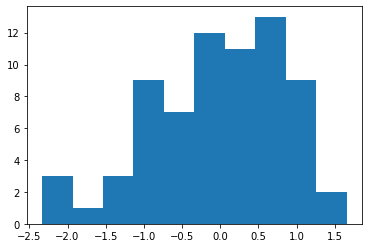

In [26]:
residuals_A2 = fluxes_A2 - convolved_model2(wavelengths_A2, *popt_A2)

plt.hist(residuals_A2 / uncertainties_A2)

std_A2 = np.std(residuals_A2 / uncertainties_A2)
print(f"Estimated Noise Standard Deviation: {std_A2:.3f}")

Estimated Noise Standard Deviation: 0.884


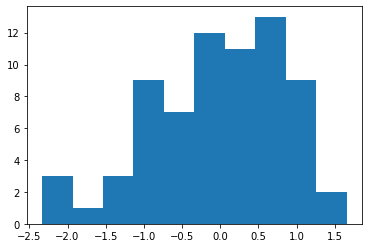

In [27]:
sigma_floor_A2 = 0
sigma_adjusted_A2 = np.sqrt(uncertainties_A2**2 + sigma_floor_A2**2)

plt.hist(residuals_A2 / sigma_adjusted_A2)

std_A2 = np.std(residuals_A2 / sigma_adjusted_A2)
print(f"Estimated Noise Standard Deviation: {std_A2:.3f}")

In [28]:
chi_squared_A2 = np.sum((residuals_A2 / sigma_adjusted_A2) ** 2)
dof_A2 = len(fluxes_A2) - len(popt_A2)

reduced_chi_squared_A2 = chi_squared_A2 / dof_A2

print(f'Chi-squared: {chi_squared_A2:.3f}')
print(f'Degree of freedom: {dof_A2:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_A2:.3f}')

Chi-squared: 54.937
Degree of freedom: 67.000
Reduced Chi-squared: 0.820


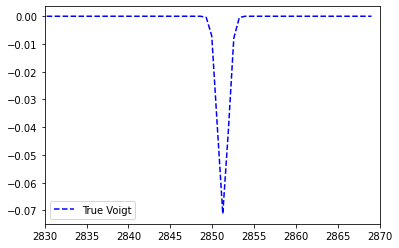

In [29]:
(recovered_peak_2853, recovered_N_2853, recovered_b_2853) = popt_A2

fwhm_L_2853 = ((recovered_peak_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2853 = (2 * recovered_peak_2853 * recovered_b_2853 * np.sqrt(np.log(2))) / c_kms
    
amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * recovered_peak_2853 * 1e-8 * recovered_N_2853) / (m_e.cgs.value * c.cgs.value * recovered_b_2853 * 1e5))

voigt_peak_targets = [amp_V_2853]
fwhm_Ls = [fwhm_L_2853]  
fwhm_Gs = [fwhm_G_2853]          
centers = [recovered_peak_2853]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum_A2 = combined_voigt(wavelengths2)

plt.plot(wavelengths2, true_spectrum_A2, '--', label="True Voigt", color='blue')
plt.xlim(2830, 2870)
plt.legend()

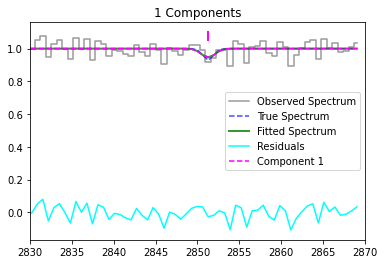

In [30]:
fitted_spectrum_A2 = convolve(true_spectrum_A2, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths_A2, fluxes_A2+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_A2, true_spectrum_A2+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_A2, fitted_spectrum_A2+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths_A2, residuals_A2, label='Residuals', color='cyan')

v1 = Voigt1D(x_0=recovered_peak_2853, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2853, fwhm_G=fwhm_G_2853)

plt.plot(wavelengths2, 1 - convolve(v1(wavelengths2), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2853]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
plt.xlim(2830, 2870)
plt.title("1 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

## (B) Mg II Line Fitting

In [31]:
p0 = [2795, 1e14, 30]
bounds = ([2794.667,1e12,1], 
          [2797.300,1e15,200])

popt, _ = curve_fit(convolved_model, wavelengths, fluxes, p0=p0, bounds=bounds, 
                    sigma=uncertainties, absolute_sigma=True, maxfev=5000)
popt

array([2.79580347e+03, 5.34809750e+13, 1.21008620e+02])

Estimated Noise Standard Deviation: 0.734


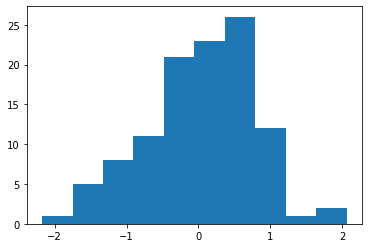

In [32]:
residuals = fluxes - convolved_model(wavelengths, *popt)

plt.hist(residuals / uncertainties)

std = np.std(residuals / uncertainties)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

Estimated Noise Standard Deviation: 0.734


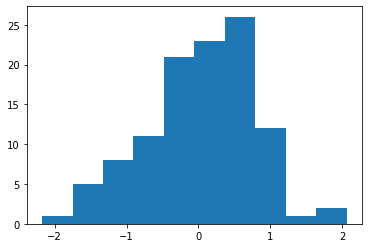

In [33]:
sigma_floor = 0
sigma_adjusted = np.sqrt(uncertainties**2 + sigma_floor**2)

plt.hist(residuals / sigma_adjusted)

std = np.std(residuals / sigma_adjusted)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

In [34]:
chi_squared = np.sum((residuals / sigma_adjusted) ** 2)
dof = len(fluxes) - len(popt)

reduced_chi_squared = chi_squared / dof

print(f'Chi-squared: {chi_squared:.3f}')
print(f'Degree of freedom: {dof:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared:.3f}')

Chi-squared: 59.427
Degree of freedom: 107.000
Reduced Chi-squared: 0.555


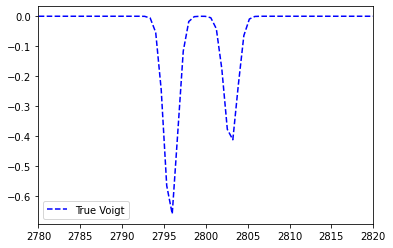

In [35]:
(recovered_peak_2796, recovered_N, recovered_b) = popt
recovered_peak_2804 = recovered_peak_2796 + (lambda_2804 - lambda_2796)

fwhm_L_2796 = ((recovered_peak_2796**2) * A_2796) / (2 * np.pi * c.value * 1e10)
fwhm_L_2804 = ((recovered_peak_2804**2) * A_2804) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2796 = (2 * recovered_peak_2796 * recovered_b * np.sqrt(np.log(2))) / c_kms
fwhm_G_2804 = (2 * recovered_peak_2804 * recovered_b * np.sqrt(np.log(2))) / c_kms
    
amp_V_2796 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2796 * recovered_peak_2796 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))
amp_V_2804 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2804 * recovered_peak_2804 * 1e-8 * recovered_N) / (m_e.cgs.value * c.cgs.value * recovered_b * 1e5))

voigt_peak_targets = [amp_V_2796, amp_V_2804]
fwhm_Ls = [fwhm_L_2796, fwhm_L_2804]  
fwhm_Gs = [fwhm_G_2796, fwhm_G_2804]          
centers = [recovered_peak_2796, recovered_peak_2804]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum = combined_voigt(wavelengths)

plt.plot(wavelengths, true_spectrum, '--', label="True Voigt", color='blue')
plt.xlim(2780, 2820)
plt.legend()

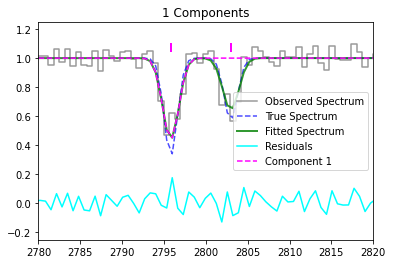

In [36]:
fitted_spectrum = convolve(true_spectrum, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths, fluxes+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths, true_spectrum+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths, fitted_spectrum+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths, residuals, label='Residuals', color='cyan')

v1 = Voigt1D(x_0=recovered_peak_2796, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2796, fwhm_G=fwhm_G_2796)

plt.plot(wavelengths_A, 1 - convolve(v1(wavelengths), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2796, recovered_peak_2804]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
#plt.xlim(2830, 2870)
plt.xlim(2780, 2820)
plt.title("1 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

## (B) Mg I Line Fitting

In [37]:
p02 = [2852, 5e12, 30]
bounds2 = ([2850.617,1e10,1], 
          [2853.250,1e13,200])

popt2, _ = curve_fit(convolved_model2, wavelengths2, fluxes2, p0=p02, bounds=bounds2, 
                    sigma=uncertainties2, absolute_sigma=True, maxfev=5000)
popt2

array([2.85166513e+03, 5.88428417e+12, 7.24800724e+01])

Estimated Noise Standard Deviation: 1.064


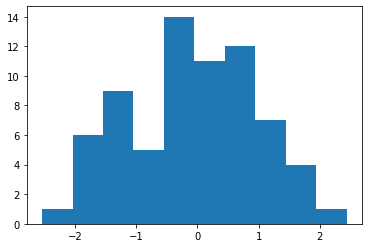

In [38]:
residuals2 = fluxes2 - convolved_model2(wavelengths2, *popt2)

plt.hist(residuals2 / uncertainties2)

std2 = np.std(residuals2 / uncertainties2)
print(f"Estimated Noise Standard Deviation: {std2:.3f}")

Estimated Noise Standard Deviation: 1.056


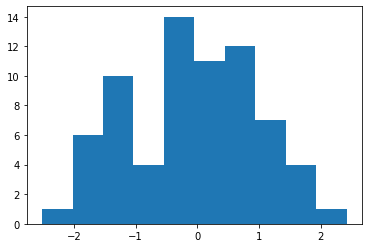

In [39]:
sigma_floor2 = 0.01
sigma_adjusted2 = np.sqrt(uncertainties2**2 + sigma_floor2**2)

plt.hist(residuals2 / sigma_adjusted2)

std = np.std(residuals2 / sigma_adjusted2)
print(f"Estimated Noise Standard Deviation: {std:.3f}")

In [40]:
chi_squared2 = np.sum((residuals2 / sigma_adjusted2) ** 2)
dof2 = len(fluxes2) - len(popt2)

reduced_chi_squared2 = chi_squared2 / dof2

print(f'Chi-squared: {chi_squared2:.3f}')
print(f'Degree of freedom: {dof2:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared2:.3f}')

Chi-squared: 78.469
Degree of freedom: 67.000
Reduced Chi-squared: 1.171


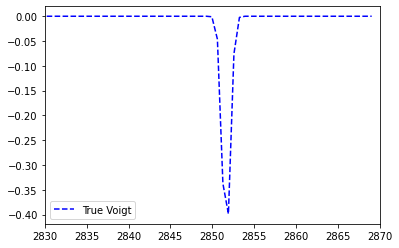

In [41]:
(recovered_peak_2853, recovered_N_2853, recovered_b_2853) = popt2

fwhm_L_2853 = ((recovered_peak_2853**2) * A_2853) / (2 * np.pi * c.value * 1e10)
    
fwhm_G_2853 = (2 * recovered_peak_2853 * recovered_b_2853 * np.sqrt(np.log(2))) / c_kms
    
amp_V_2853 = 1 - np.exp(-(np.sqrt(np.pi) * e**2 * f2853 * recovered_peak_2853 * 1e-8 * recovered_N_2853) / (m_e.cgs.value * c.cgs.value * recovered_b_2853 * 1e5))

voigt_peak_targets = [amp_V_2853]
fwhm_Ls = [fwhm_L_2853]  
fwhm_Gs = [fwhm_G_2853]          
centers = [recovered_peak_2853]

def solve_amplitude_L(target_peak, fwhm_L, fwhm_G):
    def residual(amplitude_L):
        model = Voigt1D(amplitude_L=amplitude_L, x_0=0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
        return model(0) - target_peak
        
    sol = root_scalar(residual, bracket=[1e-6, 1e6], method='brentq')
    return sol.root
    
models = []
amp_Ls = []

for peak, fwhm_L, fwhm_G, x0 in zip(voigt_peak_targets, fwhm_Ls, fwhm_Gs, centers):
    amp_L = solve_amplitude_L(peak, fwhm_L, fwhm_G)
    amp_Ls.append(amp_L)
    model = Voigt1D(amplitude_L=-amp_L, x_0=x0, fwhm_L=fwhm_L, fwhm_G=fwhm_G)
    models.append(model)
    
def combined_voigt(x):
    return sum(m(x) for m in models)
    
true_spectrum2 = combined_voigt(wavelengths2)

plt.plot(wavelengths2, true_spectrum2, '--', label="True Voigt", color='blue')
plt.xlim(2830, 2870)
plt.legend()

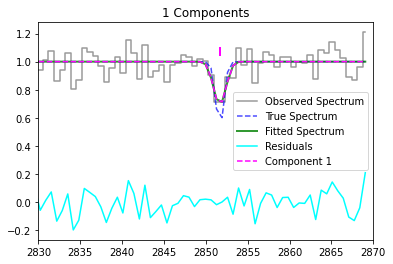

In [42]:
fitted_spectrum2 = convolve(true_spectrum2, lsf_observed, normalize_kernel=True)

plt.figure()
plt.plot(wavelengths2, fluxes2+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths2, true_spectrum2+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths2, fitted_spectrum2+1, label="Fitted Spectrum", lw=2, alpha=0.8, color='green')
plt.plot(wavelengths2, residuals2, label='Residuals', color='cyan')

v1 = Voigt1D(x_0=recovered_peak_2853, amplitude_L=amp_Ls[0], fwhm_L=fwhm_L_2853, fwhm_G=fwhm_G_2853)

plt.plot(wavelengths2, 1 - convolve(v1(wavelengths2), lsf_observed, normalize_kernel=True), '--', 
         label='Component 1', color='magenta')

line_positions1 = [recovered_peak_2853]

for xpos in line_positions1:
    plt.plot([xpos, xpos], [1.05, 1.1], color='magenta', linewidth=2)
    
plt.xlim(2830, 2870)
plt.title("1 Components")
#plt.ylim(-0.1,1.15)
plt.legend()

# 6. Monte Carlo

In [43]:
sim_W_A = []
sim_W_A2 = []
sim_W_A3 = []

sim_x_0_A = []
sim_N_A = []
sim_b_A = []
sim_x_0_A2 = []
sim_N_A2 = []
sim_b_A2 = []

sim_chi_A = []
sim_reduced_chi_A = []
sim_chi_A2 = []
sim_reduced_chi_A2 = []

sim_W = []
sim_W2 = []
sim_W3 = []

sim_x_0 = []
sim_N = []
sim_b = []
sim_x_02 = []
sim_N2 = []
sim_b2 = []

sim_chi = []
sim_reduced_chi = []
sim_chi2 = []
sim_reduced_chi2 = []

n_sim = 100

for x in range(0, n_sim):
    sim_fluxes_A = fluxes_A + np.random.normal(0, sigma_adjusted_A)
    sim_fluxes_A2 = fluxes_A2 + np.random.normal(0, sigma_adjusted_A2)
    sim_fluxes = fluxes + np.random.normal(0, sigma_adjusted)
    sim_fluxes2 = fluxes2 + np.random.normal(0, sigma_adjusted2)

    W_lambda_A = compute_ew(wavelengths_A, sim_fluxes_A, continuum_level=0, line_range=(2791, 2799))
    W_lambda_A2 = compute_ew(wavelengths_A, sim_fluxes_A, continuum_level=0, line_range=(2799, 2807))
    W_lambda_A3 = compute_ew(wavelengths_A2, sim_fluxes_A2, continuum_level=0, line_range=(2848, 2853))
    W_lambda = compute_ew(wavelengths, sim_fluxes, continuum_level=0, line_range=(2791, 2799))
    W_lambda2 = compute_ew(wavelengths, sim_fluxes, continuum_level=0, line_range=(2799, 2807))
    W_lambda3 = compute_ew(wavelengths2, sim_fluxes2, continuum_level=0, line_range=(2848, 2853))
    
    sim_W_A.append(W_lambda_A)
    sim_W_A2.append(W_lambda_A2)
    sim_W_A3.append(W_lambda_A3)
    sim_W.append(W_lambda)
    sim_W2.append(W_lambda2)
    sim_W3.append(W_lambda3)

    popt_A, _ = curve_fit(convolved_model, wavelengths_A, sim_fluxes_A, p0=p0_A, 
                        bounds=bounds_A, sigma=sigma_adjusted_A, absolute_sigma=True, maxfev=5000)
    recovered_peak_2796_A, recovered_N_A, recovered_b_A = popt_A
    
    popt_A2, __ = curve_fit(convolved_model2, wavelengths_A2, sim_fluxes_A2, p0=p0_A2, 
                            bounds=bounds_A2, sigma=sigma_adjusted_A2, absolute_sigma=True, maxfev=5000)
    recovered_peak_2853_A2, recovered_N_A2, recovered_b_A2 = popt_A2
    
    popt, _ = curve_fit(convolved_model, wavelengths, sim_fluxes, p0=p0, 
                        bounds=bounds, sigma=sigma_adjusted, absolute_sigma=True, maxfev=5000)
    recovered_peak_2796, recovered_N, recovered_b = popt
    
    popt2, __ = curve_fit(convolved_model2, wavelengths2, sim_fluxes2, p0=p02, 
                        bounds=bounds2, sigma=sigma_adjusted2, absolute_sigma=True, maxfev=5000)
    recovered_peak_28532, recovered_N2, recovered_b2 = popt2
    
    sim_x_0_A.append(recovered_peak_2796_A)
    sim_N_A.append(recovered_N_A)
    sim_b_A.append(recovered_b_A)
    
    sim_x_0_A2.append(recovered_peak_2853_A2)
    sim_N_A2.append(recovered_N_A2)
    sim_b_A2.append(recovered_b_A2)
    
    sim_x_0.append(recovered_peak_2796)
    sim_N.append(recovered_N)
    sim_b.append(recovered_b)
    
    sim_x_02.append(recovered_peak_28532)
    sim_N2.append(recovered_N2)
    sim_b2.append(recovered_b2)
    
    
    residuals_A = sim_fluxes_A - convolved_model(wavelengths_A, *popt_A)
    chi_squared_A = np.sum((residuals_A / sigma_adjusted_A) ** 2)
    dof_A = len(sim_fluxes_A) - len(popt_A)
    reduced_chi_squared_A = chi_squared_A / dof_A
    
    residuals_A2 = sim_fluxes_A2 - convolved_model2(wavelengths_A2, *popt_A2)
    chi_squared_A2 = np.sum((residuals_A2 / sigma_adjusted_A2) ** 2)
    dof_A2 = len(sim_fluxes_A2) - len(popt_A2)
    reduced_chi_squared_A2 = chi_squared_A2 / dof_A2
    
    residuals = sim_fluxes - convolved_model(wavelengths, *popt)
    chi_squared = np.sum((residuals / sigma_adjusted) ** 2)
    dof = len(sim_fluxes) - len(popt)
    reduced_chi_squared = chi_squared / dof
    
    residuals2 = sim_fluxes2 - convolved_model2(wavelengths2, *popt2)
    chi_squared2 = np.sum((residuals2 / sigma_adjusted2) ** 2)
    dof2 = len(sim_fluxes2) - len(popt2)
    reduced_chi_squared2 = chi_squared2 / dof2

    sim_chi_A.append(chi_squared_A)
    sim_reduced_chi_A.append(reduced_chi_squared)
    
    sim_chi_A2.append(chi_squared_A2)
    sim_reduced_chi_A2.append(reduced_chi_squared_A2)
    
    sim_chi.append(chi_squared)
    sim_reduced_chi.append(reduced_chi_squared)
    
    sim_chi2.append(chi_squared2)
    sim_reduced_chi2.append(reduced_chi_squared2)
print("Simulation is done")

Simulation is done


In [44]:
sim_W_A = np.array(sim_W_A)
W_A_mean = np.mean(sim_W_A)
W_A_std = np.std(sim_W_A)

sim_W_A2 = np.array(sim_W_A2)
W_A2_mean = np.mean(sim_W_A2)
W_A2_std = np.std(sim_W_A2)

sim_W_A3 = np.array(sim_W_A3)
W_A3_mean = np.mean(sim_W_A3)
W_A3_std = np.std(sim_W_A3)

sim_W = np.array(sim_W)
W_mean = np.mean(sim_W)
W_std = np.std(sim_W)

sim_W2 = np.array(sim_W2)
W2_mean = np.mean(sim_W2)
W2_std = np.std(sim_W2)

sim_W3 = np.array(sim_W3)
W3_mean = np.mean(sim_W3)
W3_std = np.std(sim_W3)

print(f"Equivalent Width A λ2796: {W_A_mean:.3f} Angstrom")
print(f"EW λ2796 errors(1σ): {W_A_std:.3f} Angstrom")
print(f"Equivalent Width A λ2804: {W_A2_mean:.3f} Angstrom")
print(f"EW λ2804 errors(1σ): {W_A2_std:.3f} Angstrom")
print(f"Equivalent Width A λ2853: {W_A3_mean:.3f} Angstrom")
print(f"EW λ2853 errors(1σ): {W_A3_std:.3f} Angstrom")
print(f"Equivalent Width B λ2796: {W_mean:.3f} Angstrom")
print(f"EW λ2796 errors(1σ): {W_std:.3f} Angstrom")
print(f"Equivalent Width B λ2804: {W2_mean:.3f} Angstrom")
print(f"EW λ2804 errors(1σ): {W2_std:.3f} Angstrom")
print(f"Equivalent Width B λ2853: {W3_mean:.3f} Angstrom")
print(f"EW λ2853 errors(1σ): {W3_std:.3f} Angstrom")

Equivalent Width A λ2796: 1.344 Angstrom
EW λ2796 errors(1σ): 0.102 Angstrom
Equivalent Width A λ2804: 1.274 Angstrom
EW λ2804 errors(1σ): 0.144 Angstrom
Equivalent Width A λ2853: 0.176 Angstrom
EW λ2853 errors(1σ): 0.089 Angstrom
Equivalent Width B λ2796: 1.540 Angstrom
EW λ2796 errors(1σ): 0.216 Angstrom
Equivalent Width B λ2804: 1.166 Angstrom
EW λ2804 errors(1σ): 0.222 Angstrom
Equivalent Width B λ2853: 0.588 Angstrom
EW λ2853 errors(1σ): 0.159 Angstrom


In [45]:
sim_x_0_A = np.array(sim_x_0_A)
x_0_2796_A_mean = np.mean(sim_x_0_A)
x_0_2796_A_std = np.std(sim_x_0_A)

sim_x_0_A2 = np.array(sim_x_0_A2)
x_0_2853_A_mean = np.mean(sim_x_0_A2)
x_0_2853_A_std = np.std(sim_x_0_A2)

sim_x_0 = np.array(sim_x_0)
x_0_2796_mean = np.mean(sim_x_0)
x_0_2796_std = np.std(sim_x_0)

sim_x_02 = np.array(sim_x_02)
x_0_2853_mean = np.mean(sim_x_02)
x_0_2853_std = np.std(sim_x_02)


print(f"Fitted Peak A λ2796: {x_0_2796_A_mean:.3f} Angstrom")
print(f"Peak Component 1 errors(1σ): {x_0_2796_A_std:.3f} Angstrom")
print(f"Fitted Peak A λ2853: {x_0_2853_A_mean:.3f} Angstrom")
print(f"Peak Component 2 errors(1σ): {x_0_2853_A_std:.3f} Angstrom")
print(f"Fitted Peak B λ2796: {x_0_2796_mean:.3f} Angstrom")
print(f"Peak Component 1 errors(1σ): {x_0_2796_std:.3f} Angstrom")
print(f"Fitted Peak B λ2853: {x_0_2853_mean:.3f} Angstrom")
print(f"Peak Component 2 errors(1σ): {x_0_2853_std:.3f} Angstrom")

Fitted Peak A λ2796: 2796.371 Angstrom
Peak Component 1 errors(1σ): 0.045 Angstrom
Fitted Peak A λ2853: 2851.964 Angstrom
Peak Component 2 errors(1σ): 0.660 Angstrom
Fitted Peak B λ2796: 2795.772 Angstrom
Peak Component 1 errors(1σ): 0.124 Angstrom
Fitted Peak B λ2853: 2851.811 Angstrom
Peak Component 2 errors(1σ): 0.246 Angstrom


In [46]:
sim_N_A = np.array(sim_N_A)
N_A_mean = np.log10(np.mean(sim_N_A))
N_A_std = (1/np.log(10)) * (np.std(sim_N_A) / np.mean(sim_N_A))

sim_N_A2 = np.array(sim_N_A2)
N_A2_mean = np.log10(np.mean(sim_N_A2))
N_A2_std = (1/np.log(10)) * (np.std(sim_N_A2) / np.mean(sim_N_A2))

sim_N = np.array(sim_N)
N_mean = np.log10(np.mean(sim_N))
N_std = (1/np.log(10)) * (np.std(sim_N) / np.mean(sim_N))

sim_N2 = np.array(sim_N2)
N2_mean = np.log10(np.mean(sim_N2))
N2_std = (1/np.log(10)) * (np.std(sim_N2) / np.mean(sim_N2))

print(f"Fitted Column Density (log N) A λ2796: {N_A_mean:.3f} 1/cm^2")
print(f"log N errors(1σ): {N_A_std:.3f} 1/cm^2")
print(f"Fitted Column Density (log N) A λ2853: {N_A2_mean:.3f} 1/cm^2")
print(f"log N errors(1σ): {N_A2_std:.3f} 1/cm^2")
print(f"Fitted Column Density (log N) B λ2796: {N_mean:.3f} 1/cm^2")
print(f"log N errors(1σ): {N_std:.3f} 1/cm^2")
print(f"Fitted Column Density (log N) B λ2853: {N2_mean:.3f} 1/cm^2")
print(f"log N errors(1σ): {N2_std:.3f} 1/cm^2")

Fitted Column Density (log N) A λ2796: 14.328 1/cm^2
log N errors(1σ): 0.563 1/cm^2
Fitted Column Density (log N) A λ2853: 12.096 1/cm^2
log N errors(1σ): 0.267 1/cm^2
Fitted Column Density (log N) B λ2796: 13.917 1/cm^2
log N errors(1σ): 0.756 1/cm^2
Fitted Column Density (log N) B λ2853: 12.740 1/cm^2
log N errors(1σ): 0.135 1/cm^2


In [47]:
sim_b_A = np.array(sim_b_A)
b_A_mean = np.mean(sim_b_A)
b_A_std = np.std(sim_b_A)

sim_b_A2 = np.array(sim_b_A2)
b_A2_mean = np.mean(sim_b_A2)
b_A2_std = np.std(sim_b_A2)

sim_b = np.array(sim_b)
b_mean = np.mean(sim_b)
b_std = np.std(sim_b)

sim_b2 = np.array(sim_b2)
b2_mean = np.mean(sim_b2)
b2_std = np.std(sim_b2)

print(f"Fitted Doppler Parameter (b) λ2796: {b_A_mean:.3f} km/s")
print(f"b errors(1σ): {b_A_std:.3f} km/s")
print(f"Fitted Doppler Parameter (b) λ2853: {b_A2_mean:.3f} km/s")
print(f"b errors(1σ): {b_A2_std:.3f} km/s")
print(f"Fitted Doppler Parameter (b) λ2796: {b_mean:.3f} km/s")
print(f"b errors(1σ): {b_std:.3f} km/s")
print(f"Fitted Doppler Parameter (b) λ2853: {b2_mean:.3f} km/s")
print(f"b errors(1σ): {b2_std:.3f} km/s")

Fitted Doppler Parameter (b) λ2796: 77.947 km/s
b errors(1σ): 12.032 km/s
Fitted Doppler Parameter (b) λ2853: 75.005 km/s
b errors(1σ): 67.900 km/s
Fitted Doppler Parameter (b) λ2796: 117.246 km/s
b errors(1σ): 23.445 km/s
Fitted Doppler Parameter (b) λ2853: 53.404 km/s
b errors(1σ): 38.291 km/s


(array([ 9., 46.,  9.,  6.,  2.,  3.,  2.,  2.,  2., 19.]),
 array([  1.2650207 ,  21.13851863,  41.01201656,  60.88551449,
         80.75901242, 100.63251035, 120.50600828, 140.37950621,
        160.25300414, 180.12650207, 200.        ]),
 <BarContainer object of 10 artists>)

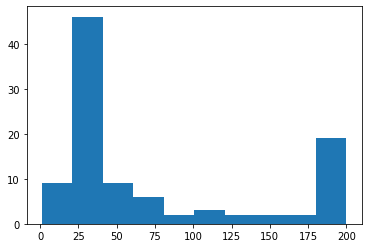

In [48]:
plt.hist(sim_b_A2)

33.416676065086044
14.369653344327295


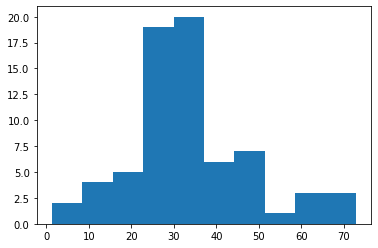

In [49]:
# removing outliers
threshold = 80
filtered_sim_b_A2 = sim_b_A2[sim_b_A2 <= threshold]

plt.hist(filtered_sim_b_A2)
print(np.mean(filtered_sim_b_A2))
print(np.std(filtered_sim_b_A2))
#sim_b_A2

(array([ 5., 52.,  5., 10.,  7.,  5.,  8.,  5.,  2.,  1.]),
 array([  1.1316009 ,  18.17283118,  35.21406146,  52.25529174,
         69.29652202,  86.33775231, 103.37898259, 120.42021287,
        137.46144315, 154.50267343, 171.54390371]),
 <BarContainer object of 10 artists>)

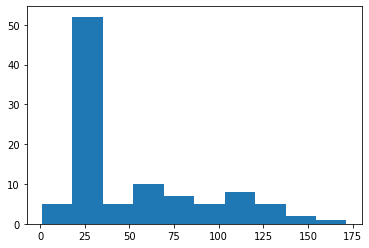

In [50]:
plt.hist(sim_b2)

26.622389373018628
7.499180558655439


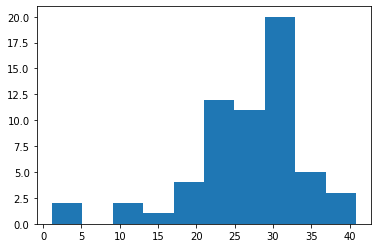

In [52]:
# removing outliers
threshold = 45
filtered_sim_b2 = sim_b2[sim_b2 <= threshold]

plt.hist(filtered_sim_b2)
print(np.mean(filtered_sim_b2))
print(np.std(filtered_sim_b2))
#sim_b_A2

In [53]:
sim_chi_A = np.array(sim_chi_A)
chi_A_mean = np.mean(sim_chi_A)
chi_A_std = np.std(sim_chi_A)

sim_reduced_chi_A = np.array(sim_reduced_chi_A)
reduced_chi_A_mean = np.mean(sim_reduced_chi_A)
reduced_chi_A_std = np.std(sim_reduced_chi_A)

sim_chi_A2 = np.array(sim_chi_A2)
chi_A2_mean = np.mean(sim_chi_A2)
chi_A2_std = np.std(sim_chi_A2)

sim_reduced_chi_A2 = np.array(sim_reduced_chi_A2)
reduced_chi_A2_mean = np.mean(sim_reduced_chi_A2)
reduced_chi_A2_std = np.std(sim_reduced_chi_A2)

sim_chi = np.array(sim_chi)
chi_mean = np.mean(sim_chi)
chi_std = np.std(sim_chi)

sim_reduced_chi = np.array(sim_reduced_chi)
reduced_chi_mean = np.mean(sim_reduced_chi)
reduced_chi_std = np.std(sim_reduced_chi)

sim_chi2 = np.array(sim_chi2)
chi2_mean = np.mean(sim_chi2)
chi2_std = np.std(sim_chi2)

sim_reduced_chi2 = np.array(sim_reduced_chi2)
reduced_chi2_mean = np.mean(sim_reduced_chi2)
reduced_chi2_std = np.std(sim_reduced_chi2)

print(f"Mean Reduced Chi-squared A λ2796: {reduced_chi_A_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi_A_std:.3f}")
print(f"Mean Reduced Chi-squared A λ2853: {reduced_chi_A2_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi_A2_std:.3f}")
print(f"Mean Reduced Chi-squared B λ2796: {reduced_chi_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi_std:.3f}")
print(f"Mean Reduced Chi-squared B λ2853: {reduced_chi2_mean:.3f}")
print(f"Reduced Chi-squared errors(1σ): {reduced_chi2_std:.3f}")

Mean Reduced Chi-squared A λ2796: 1.527
Reduced Chi-squared errors(1σ): 0.189
Mean Reduced Chi-squared A λ2853: 1.796
Reduced Chi-squared errors(1σ): 0.265
Mean Reduced Chi-squared B λ2796: 1.527
Reduced Chi-squared errors(1σ): 0.189
Mean Reduced Chi-squared B λ2853: 2.197
Reduced Chi-squared errors(1σ): 0.312


# 7. Parameter Estimation

In [54]:
vel_sys_A_2796 = ((x_0_2796_A_mean - lambda_2796) / lambda_2796) * c_kms
vel_sys_A_2853 = ((x_0_2853_A_mean - lambda_2853) / lambda_2853) * c_kms
vel_sys_2796 = ((x_0_2796_mean - lambda_2796) / lambda_2796) * c_kms
vel_sys_2853 = ((x_0_2853_mean - lambda_2853) / lambda_2853) * c_kms

err_vel_sys_A_2796 = (c_kms / lambda_2796) * x_0_2796_A_std
err_vel_sys_A_2853 = (c_kms / lambda_2853) * x_0_2853_A_std
err_vel_sys_2796 = (c_kms / lambda_2796) * x_0_2796_std
err_vel_sys_2853 = (c_kms / lambda_2853) * x_0_2853_std

print(f"System Velocity A λ2796: {vel_sys_A_2796:.3f} ± {err_vel_sys_A_2796:.3f} km/s")
print(f"System Velocity A λ2853: {vel_sys_A_2853:.3f} ± {err_vel_sys_A_2853:.3f} km/s")
print(f"System Velocity B λ2796: {vel_sys_2796:.3f} ± {err_vel_sys_2796:.3f} km/s")
print(f"System Velocity B λ2853: {vel_sys_2853:.3f} ± {err_vel_sys_2853:.3f} km/s")

System Velocity A λ2796: 1.799 ± 4.865 km/s
System Velocity A λ2853: -105.154 ± 69.353 km/s
System Velocity B λ2796: -62.457 ± 13.332 km/s
System Velocity B λ2853: -121.214 ± 25.870 km/s


In [85]:
vr_A_2796 = b_A_mean / np.sqrt(2)
vr_A_2853 = b_A2_mean / np.sqrt(2)
vr_2796 = b_mean / np.sqrt(2)
vr_2853 = b2_mean / np.sqrt(2)

err_vr_A_2796 = b_A_std / np.sqrt(2)
err_vr_A_2853 = b_A2_std / np.sqrt(2)
err_vr_2796 = b_std / np.sqrt(2)
err_vr_2853 = b2_std / np.sqrt(2)

print(f"Velocity Dispersion A λ2796: {vr_A_2796:.3f} ± {err_vr_A_2796:.3f} km/s")
print(f"Velocity Dispersion A λ2853: {vr_A_2853:.3f} ± {err_vr_A_2853:.3f} km/s")
print(f"Velocity Dispersion A λ2796: {vr_2796:.3f} ± {err_vr_2796:.3f} km/s")
print(f"Velocity Dispersion A λ2853: {vr_2853:.3f} ± {err_vr_2853:.3f} km/s")

Velocity Dispersion A λ2796: 56.451 ± 8.200 km/s
Velocity Dispersion A λ2853: 55.572 ± 45.614 km/s
Velocity Dispersion A λ2796: 81.728 ± 13.353 km/s
Velocity Dispersion A λ2853: 24.102 ± 20.904 km/s


In [86]:
m_mg = 24.305 * 1.66e-27

T_A = (((b_A_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)
T_A2 = (((b_A2_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)
T = (((b_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)
T2 = (((b2_mean * 1e3)**2) * m_mg) / (2 * const.Boltzmann)

err_T_A = (2 * T_A * b_A_std) / b_A_mean
err_T_A2 = (2 * T_A2 * b_A2_std) / b_A_mean
err_T = (2 * T * b_std) / b_mean
err_T2 = (2 * T2 * b2_std) / b_mean

print(f"Temperature A λ2796: {T_A:.3e} ± {err_T_A:.3e} K")
print(f"Temperature A λ2853: {T_A2:.3e} ± {err_T_A2:.3e} K")
print(f"Temperature B λ2796: {T:.3e} ± {err_T:.3e} K")
print(f"Temperature B λ2853: {T2:.3e} ± {err_T2:.3e} K")

Temperature A λ2796: 9.313e+06 ± 2.705e+06 K
Temperature A λ2853: 9.025e+06 ± 1.458e+07 K
Temperature B λ2796: 1.952e+07 ± 6.378e+06 K
Temperature B λ2853: 1.697e+06 ± 8.683e+05 K


# 8. Relative Velocity & Corner Plot

In [87]:
x_0_2804_A_mean = x_0_2796_A_mean + (lambda_2804 - lambda_2796)
x_0_2804_mean = x_0_2796_mean + (lambda_2804 - lambda_2796)

In [88]:
v_2796_A = c_kms * (wavelengths_A - lambda_2796) / lambda_2796
v_2804_A = c_kms * (wavelengths_A - lambda_2804) / lambda_2804
v_2853_A = c_kms * (wavelengths_A2 - lambda_2853) / lambda_2853

v_2796 = c_kms * (wavelengths - lambda_2796) / lambda_2796
v_2804 = c_kms * (wavelengths - lambda_2804) / lambda_2804
v_2853 = c_kms * (wavelengths2 - lambda_2853) / lambda_2853

In [89]:
vline_2796_A = c_kms * (x_0_2796_A_mean - lambda_2796) / lambda_2796
vline_2804_A = c_kms * (x_0_2804_A_mean - lambda_2804) / lambda_2804
vline_2853_A = c_kms * (x_0_2853_A_mean - lambda_2853) / lambda_2853

vline_2796 = c_kms * (x_0_2796_mean - lambda_2796) / lambda_2796
vline_2804 = c_kms * (x_0_2804_mean - lambda_2804) / lambda_2804
vline_2853 = c_kms * (x_0_2853_mean - lambda_2853) / lambda_2853

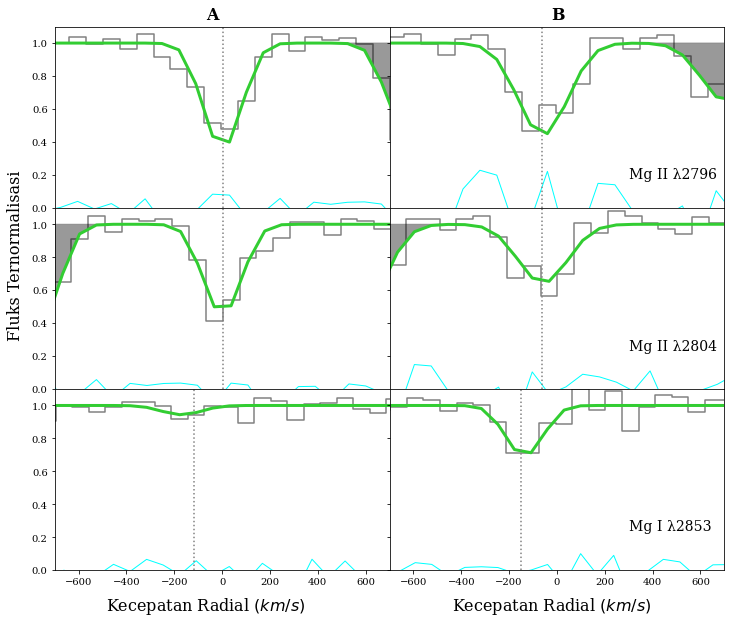

In [168]:
f, ax = plt.subplots(3, 2, figsize=(12,10), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

# A
ax[0,0].plot(v_2796_A, fluxes_A+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[0,0].plot(v_2796_A, fitted_spectrum_A+1, color='limegreen', lw=3)
ax[0,0].plot(v_2796_A, residuals_A, color='cyan', lw=1)
ax[0,0].axvline(vline_2796_A, color="grey", linestyle=":")
ax[0,0].fill_between(v_2796_A, fitted_spectrum_A+1, 1, where=(v_2796_A > 350), color='gray', alpha=0.8)
ax[0,0].set_ylim(-0,1.1)
ax[0,0].set_xlim(-700, 700)

ax[1,0].plot(v_2804_A, fluxes_A+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[1,0].plot(v_2804_A, fitted_spectrum_A+1, color='limegreen', lw=3)
ax[1,0].plot(v_2804_A, residuals_A, color='cyan', lw=1)
ax[1,0].axvline(vline_2804_A, color="grey", linestyle=":")
ax[1,0].fill_between(v_2804_A, fitted_spectrum_A+1, 1, where=(v_2804_A < -450), color='gray', alpha=0.8)
ax[1,0].set_ylim(0, 1.1)

ax[2,0].plot(v_2853_A, fluxes_A2+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[2,0].plot(v_2853_A, fitted_spectrum_A2+1, color='limegreen', lw=3)
ax[2,0].plot(v_2853_A, residuals_A2, color='cyan', lw=1)
ax[2,0].set_ylim(0, 1.1)
ax[2,0].axvline(vline_2853_A, color="grey", linestyle=":")

# B
ax[0,1].plot(v_2796, fluxes+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[0,1].plot(v_2796, fitted_spectrum+1, color='limegreen', lw=3)
ax[0,1].fill_between(v_2796, fitted_spectrum+1, 1, where=(v_2796 > 350), color='gray', alpha=0.8)
ax[0,1].plot(v_2796, residuals, color='cyan', lw=1)
ax[0,1].axvline(vline_2796, color="grey", linestyle=":")
ax[0,1].set_xlim(-700, 700)

ax[1,1].plot(v_2804, fluxes+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[1,1].plot(v_2804, fitted_spectrum+1, color='limegreen', lw=3)
ax[1,1].plot(v_2804, residuals, color='cyan', lw=1)
ax[1,1].fill_between(v_2804, fitted_spectrum+1, 1, where=(v_2804 < -450), color='gray', alpha=0.8)
ax[1,1].axvline(vline_2804, color="grey", linestyle=":")

ax[2,1].plot(v_2853, fluxes2+1, 'k', alpha=0.5, drawstyle='steps-mid')
ax[2,1].plot(v_2853, fitted_spectrum2+1, color='limegreen', lw=3)
ax[2,1].plot(v_2853, residuals2, color='cyan', lw=1)
ax[2,1].axvline(vline_2853, color="grey", linestyle=":")

f.text(0.3, 0.89, 'A', fontsize=16, fontweight='bold')
f.text(0.7, 0.89, 'B', fontsize=16, fontweight='bold')

f.text(0.79,0.67, 'Mg II λ2796', fontsize=14)
f.text(0.79,0.43, 'Mg II λ2804', fontsize=14)
f.text(0.79,0.18, 'Mg I λ2853', fontsize=14)

f.text(0.3, 0.07, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.7, 0.07, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.07, 0.45, 'Fluks Ternormalisasi', fontsize=16, rotation='vertical')

plt.show()

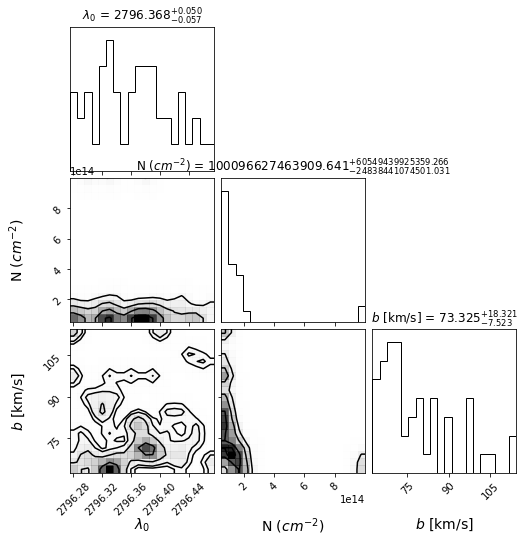

In [196]:
samples = np.vstack([sim_x_0_A, sim_N_A, sim_b_A]).T

# Define parameter labels for the plot
labels = [r"$\lambda_0$", "N $(cm^{-2})$", r"$b$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples,
    labels=labels,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

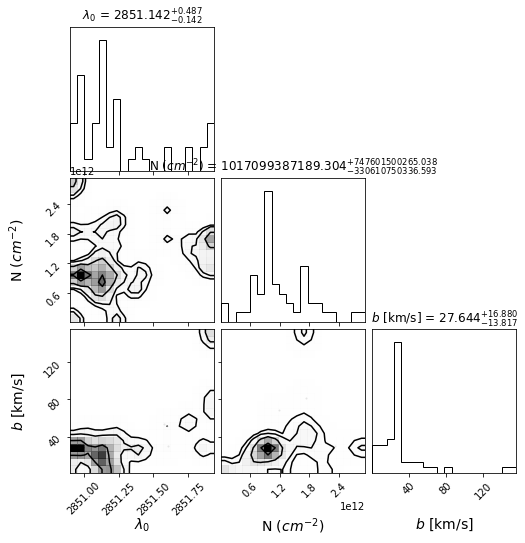

In [197]:
samples = np.vstack([sim_x_0_A2, sim_N_A2, sim_b_A2]).T

# Define parameter labels for the plot
labels = [r"$\lambda_0$", "N $(cm^{-2})$", r"$b$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples,
    labels=labels,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

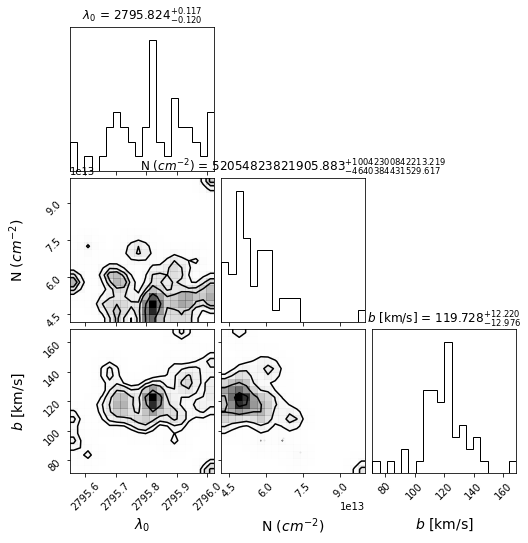

In [194]:
samples = np.vstack([sim_x_0, sim_N, sim_b]).T

# Define parameter labels for the plot
labels = [r"$\lambda_0$", "N $(cm^{-2})$", r"$b$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples,
    labels=labels,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()

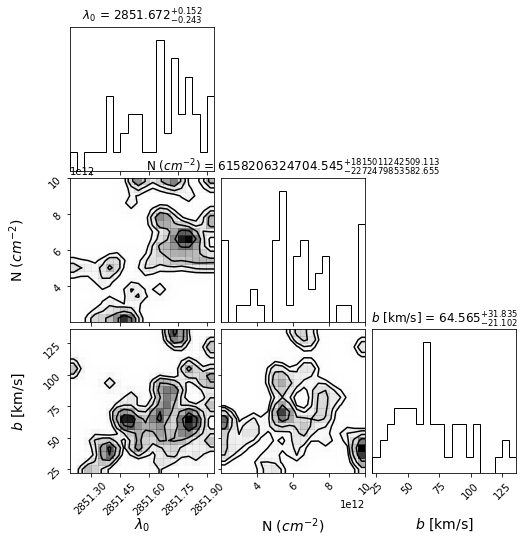

In [195]:
samples = np.vstack([sim_x_02, sim_N2, sim_b2]).T

# Define parameter labels for the plot
labels = [r"$\lambda_0$", "N $(cm^{-2})$", r"$b$ [km/s]"]


# Create the corner plot
fig = corner.corner(
    samples,
    labels=labels,
    show_titles=True,
    title_fmt=".3f",
    title_kwargs={"fontsize": 12},
    label_kwargs={"fontsize": 14},
    smooth=1.0  # Apply KDE smoothing (optional)
)

plt.show()